In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
%matplotlib inline

__Оптимизировать__ 

$$ x^2(\sin(0.5x)^2+1) \tag{1}$$

- При каких значениях $\alpha$ оптимизация проходит успешно, а при каких "застревает"?

Эксперименты показывают, что при больших значениях $\alpha$ увеличивается шанс выйти на глобальный минимум, но также есть вероятность уйти в разлет. Чем меньше значения - тем больше вероятность остаться в локальном минимуме. 

При $\alpha={0.1..0.05}$ все успешные итерации приводят в глобальный минимум, но много разлетов  
При $\alpha=0.001$ и менее много итераций заканчиваются в локальных минимумах.

Как итоговое решение - сделать n запусков градиентного спуска в рандомной стартовой точке и найти среди всех итоговых результирующих значений x значение функции и выбрать минимальное. 
___

Производная выражения (1)  

$$ \frac{\partial}{\partial x} = x (2 sin^2(0.5 x) + x sin(0.5 x) cos(0.5 x) + 2) $$

In [2]:
def func(_x):
    return (_x ** 2) * (np.sin(0.5 * _x) ** 2 + 1)


def grad(_x):
    return _x * (2 * np.sin(0.5 * _x) ** 2 +
                 _x * np.sin(0.5 * _x) * np.cos(0.5 * _x) + 2)


def approx_grad(function, starting_point, delta=0.01):
    return (function(starting_point + delta) - function(
        starting_point - delta)) / (2 * delta)


class Optimizer:
    def __init__(self, learning_rate=0.001, n_iter=1000):
        self.alpha = learning_rate
        self.n_iter = n_iter
        self.x_dict = {}

    def fit(self, gradient_func, rep=1, delta=1e-14):
        for j in range(rep):
            _tmp_list = []
            # рандомно выбираем стартовую точку
            x0 = np.random.uniform(-50, 50)
            # записываем ее в переменную, чтобы потом можно было 
            # посмотреть старт/финиш
            st_point = x0
            for i in range(self.n_iter):
                x0 -= self.alpha * gradient_func(x0)
                # Остановить цикл, если изменения в значениях меньше дельты
                if _tmp_list and abs(x0 - _tmp_list[-1]) <= delta:
                    break
                # чтобы не записывать в список NaN и inf значения, 
                # в случае разлета
                if np.isfinite(x0): 
                    _tmp_list.append(x0)
            self.x_dict[st_point] = _tmp_list
            
    def min_values(self):
        return [self.x_dict[_x][-1] for _x in self.x_dict.keys()]
    
    def gl_min(self):
        return min([func(_x) for _x in opt.min_values()])
        

Проверим найденную производную

In [3]:
x0=np.random.uniform(-50, 50)
print('True gradient:', grad(x0))
print('Approximating:', approx_grad(func, x0))

True gradient: 439.8768419411982
Approximating: 439.8706948482413


In [4]:
opt = Optimizer(learning_rate=0.001, n_iter=10000)
opt.fit(grad, 20)

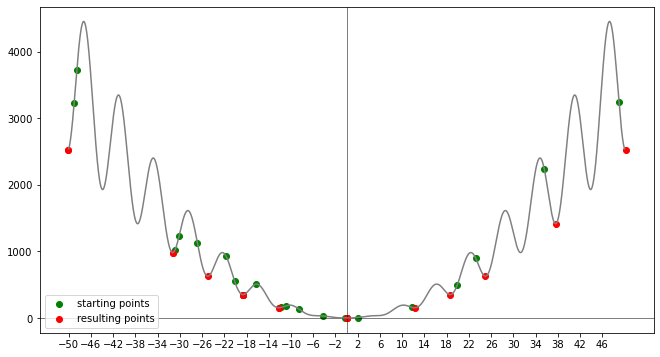

In [5]:
plt.figure(figsize=(11, 6))
x = np.linspace(-50, 50, 5000)
plt.axhline(lw=0.5, color='black')
plt.axvline(lw=0.5, color='black')
plt.xticks(np.arange(-50, 50, 4))
plt.plot(x, func(x), color='grey')
plt.scatter(opt.x_dict.keys(), [func(_x) for _x in opt.x_dict.keys()], 
            color='green', label='starting points')
plt.scatter(opt.min_values(), [func(_x) for _x in opt.min_values()], 
            color='red', label='resulting points')
plt.legend(loc='best');

In [6]:
# Минимум функции
opt.gl_min()

4.2096111536474093e-19